In [1]:
import pandas as pd
import numpy as np
l = pd.read_csv('train.csv')

### EDA

In [2]:
l.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
l.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
l.shape

(614, 13)

In [6]:
l.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
l = l.dropna()

In [8]:
l.shape

(480, 13)

In [9]:
l.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
l.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace = True)

In [11]:
l.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
l.drop('Loan_ID', axis = 1, inplace = True)

In [13]:
l['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [14]:
l.replace({'Gender':{'Male':0, 'Female':1}}, inplace = True)

In [15]:
l['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [16]:
l.replace({'Married':{'No':0, 'Yes':1}}, inplace = True)

In [17]:
l

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,0,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,0,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,0,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,0,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [18]:
l['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [19]:
l.replace({'Dependents':{'3+':3}}, inplace = True)
l['Dependents'] = l['Dependents'].apply(lambda x : int(x))

In [20]:
l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 48.8+ KB


In [21]:
l['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [22]:
l.replace({'Education':{'Graduate':0,'Not Graduate':1}}, inplace = True)

In [23]:
l['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [24]:
l.replace({'Self_Employed':{'No':0, 'Yes':1}}, inplace = True)

In [25]:
l['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [26]:
l.replace({'Property_Area':{'Rural':1,'Semiurban':1,'Urban':0}}, inplace = True)

In [27]:
l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [28]:
l['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [29]:
def toint(x):
    l[x] = l[x].apply(lambda x:int(x))

In [30]:
toint('CoapplicantIncome')
toint('LoanAmount')
toint('Loan_Amount_Term')

In [31]:
l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    int64  
 7   LoanAmount         480 non-null    int64  
 8   Loan_Amount_Term   480 non-null    int64  
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 48.8 KB


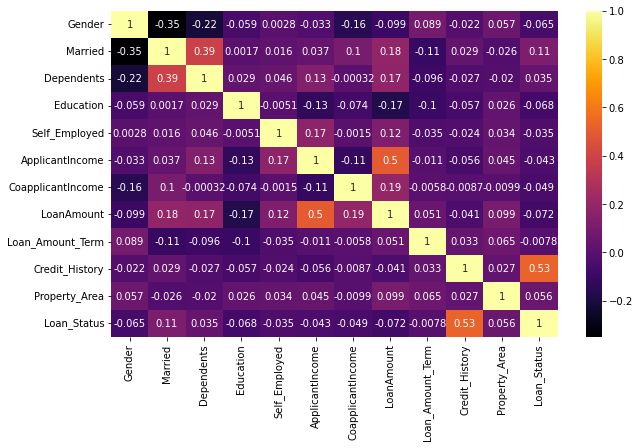

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(l.corr(), annot = True, cmap = 'inferno');

In [33]:
c = l.corr()
c['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.529390
Married              0.112321
Property_Area        0.055964
Dependents           0.035428
Loan_Amount_Term    -0.007798
Self_Employed       -0.034715
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
Gender              -0.064504
Education           -0.068437
LoanAmount          -0.071753
Name: Loan_Status, dtype: float64

In [34]:
l.drop('Loan_Amount_Term',axis = 1, inplace = True)

### Data Visualization

In [35]:
def cp(x):
    sns.countplot(x = x, hue = 'Loan_Status', data = l)

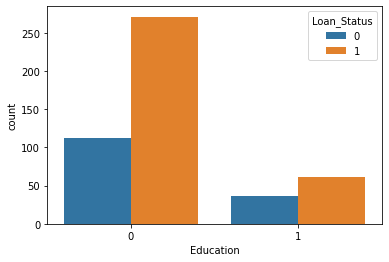

In [36]:
cp('Education')

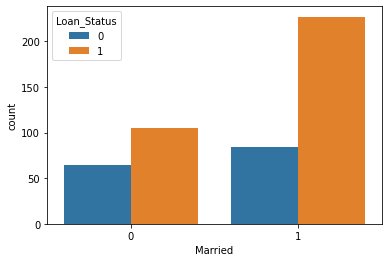

In [37]:
cp('Married')

In [38]:
X = l.drop('Loan_Status', axis = 1)
y = l['Loan_Status']

In [39]:
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1           1          0              0             4583   
2         0        1           0          0              1             3000   
3         0        1           0          1              0             2583   
4         0        0           0          0              0             6000   
5         0        1           2          0              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       1        0           0          0              0             2900   
610       0        1           3          0              0             4106   
611       0        1           1          0              0             8072   
612       0        1           2          0              0             7583   
613       1        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Credit_History 

In [40]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


### Model

In [46]:
from sklearn.model_selection import train_test_split

a,d,s,f = train_test_split(X,y, test_size = 0.1, stratify = y, random_state = 42)

In [47]:
from sklearn.svm import SVC

m = SVC(kernel = 'linear')
m.fit(a,s)
g = m.predict(d)

In [50]:
from sklearn.metrics import accuracy_score

print('test accuracy score : ',accuracy_score(f,g))

test accuracy score :  0.7708333333333334


In [51]:
h = m.predict(a)
from sklearn.metrics import accuracy_score

print('train accuracy score : ',accuracy_score(s,h))

train accuracy score :  0.7847222222222222
